<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/Top_ten_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

url  = [ #ibra50
  'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_IBr50.csv'
#ibra100
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_IBr100.csv'
#div
  , 'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Idiv.csv' 
#ibov
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Ibov.csv'
#small
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Small.csv'
]

escolha = int(input('0-ibra50; 1-ibra100; 2-idiv; 3-ibov; 4-smal: '))
indice = { 0:'Ibra50' , 1:'Ibra100' , 2:'Idiv' , 3:'Ibov' , 4:'Small'}
df = pd.read_csv(url[escolha] ,sep=';' , decimal=',' , thousands='.' , header=1 , skiprows=0 , skipfooter=2 , encoding='latin-1',index_col=False , engine='python')

data = yf.download((df['Código']+'.SA').to_list(),
                         period="3mo",
                         interval="1d",
                         auto_adjust=True,
                         back_adjust=True,
                         prepost=True)

[*********************100%%**********************]  50 of 50 completed


In [3]:
data_close = data['Close']
data_returns = data_close.pct_change(1).dropna()
data_returns.head()

Ticker,ABCB4.SA,AGRO3.SA,ALUP11.SA,AURE3.SA,BBAS3.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRSR6.SA,CMIG3.SA,...,SANB11.SA,TAEE11.SA,TASA4.SA,TGMA3.SA,TRPL4.SA,UNIP6.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WIZC3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-15,0.041277,0.013322,0.006885,0.007758,0.000171,0.002429,0.017323,-0.002738,0.013587,-0.003989,...,0.008144,0.005602,0.015692,-0.008181,0.001511,0.025358,0.055556,-0.003195,-0.008442,0.000000
2024-02-16,0.011443,0.016964,-0.008205,0.003849,-0.008396,-0.010603,0.009288,0.018307,0.000000,0.007343,...,0.020372,-0.006964,0.006320,0.010212,-0.006790,0.005005,0.023279,0.038009,-0.025356,0.016234
2024-02-19,0.005252,-0.011676,0.008273,0.017638,0.018144,0.003368,0.003067,-0.004494,0.009383,0.003976,...,0.001377,-0.007013,-0.010468,-0.002722,0.004937,-0.019482,0.004946,-0.007500,0.003798,-0.011182
2024-02-20,0.004823,0.013502,0.004786,-0.025622,0.006449,0.010375,-0.010703,-0.021670,0.025896,0.020462,...,0.009282,0.000847,0.011283,0.010526,0.013228,0.025695,0.016732,-0.021929,0.001324,0.017771
2024-02-21,-0.022000,-0.014988,-0.004083,0.010054,0.002361,-0.006342,0.020093,-0.005999,-0.005178,-0.025227,...,-0.013283,-0.014959,-0.016039,-0.013889,-0.037300,-0.018206,0.001936,0.007575,0.013036,-0.011111


Vamos remover ações que esticaram muito em um único dia;eliminar todas as linhas que cresceram mais de 20% em um dia.

In [4]:
print(data_returns.shape)
# set the growth theshold
daily_growth_threshold = 0.2
# keep only the columns without a daily growth that big
data_returns = data_returns.loc[:, ~(data_returns >=daily_growth_threshold).any()]
print(data_returns.shape)


(61, 50)
(61, 50)


In [5]:
# calculate the cumulative daily growth
data_cum_returns = (1 + data_returns).cumprod() -1

#### The  Top Ten  


In [11]:
# take the last row, transpose, x100
latest = data_cum_returns.tail(1).T.mul(100)
latest.columns = ['% change']
topten = round(latest.sort_values(by='% change', ascending=False)[:15], 2)
topten

,% change
Ticker,
CMIG4.SA,25.99
LAVV3.SA,23.39
CXSE3.SA,19.99
DIRR3.SA,15.05
GOAU4.SA,14.96
KLBN11.SA,14.75
CURY3.SA,14.59
WIZC3.SA,13.93
GGBR4.SA,12.73


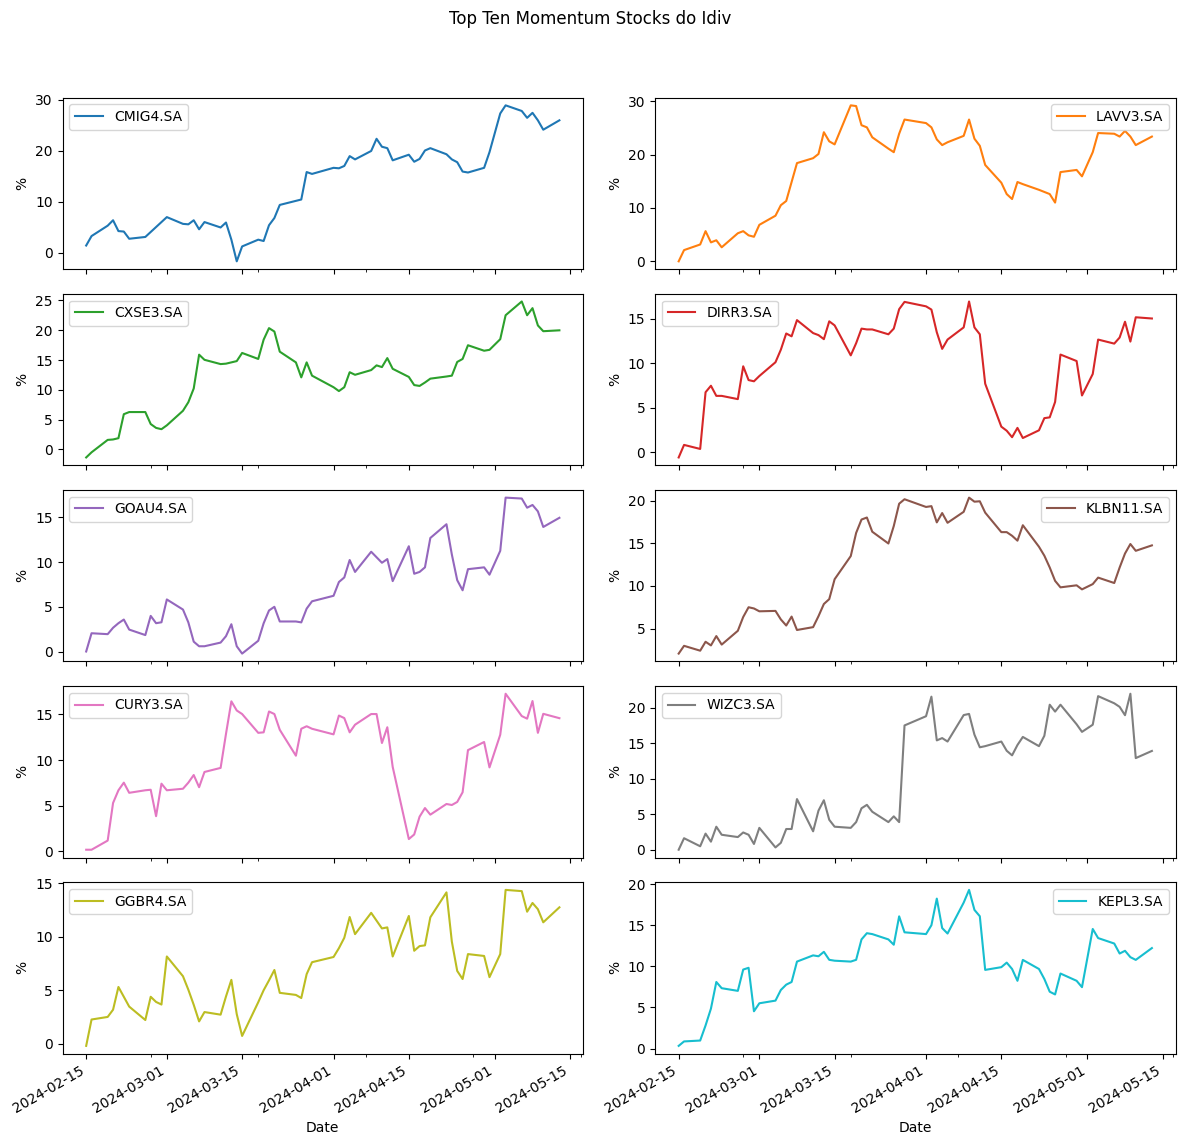

In [7]:
# plot the current top ten
data_cum_returns[list(topten.index)].mul(100).plot(subplots=True,
                                          layout=(5, 2),
                                          figsize=(12,12),
                                          sharex=True,
                                          ylabel='%',
                                          title=f'Top Ten Momentum Stocks do {indice[escolha]}')
# tweek the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Infos


In [8]:
topten.index

Index(['CMIG4.SA', 'LAVV3.SA', 'CXSE3.SA', 'DIRR3.SA', 'GOAU4.SA', 'KLBN11.SA',
       'CURY3.SA', 'WIZC3.SA', 'GGBR4.SA', 'KEPL3.SA'],
      dtype='object', name='Ticker')

In [9]:
# get further information
topten_info = {}
for i in topten.index:
    topten_info[i] = yf.Ticker(i).get_info()
# add the information to a data frame
info_df = pd.DataFrame.from_dict(topten_info,orient='index')
# add the growth data
info_df['Growth'] = topten
# rank the companies by growth rate
info_df.sort_values(by=['Growth'], ascending=False, inplace=True)
info_df.head()

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,address2,fax,compensationAsOfEpochDate,Growth
CMIG4.SA,"Avenida Barbacena, 1200",Belo Horizonte,MG,30190-131,Brazil,55 31 3506 5024,https://www.cemig.com.br,Utilities - Diversified,utilities-diversified,Utilities - Diversified,...,0.021,0.18517,0.22560,0.22788,BRL,None,NaN,NaN,NaN,25.99
LAVV3.SA,"Av. Angélica, 2346",São Paulo,SP,01228-200,Brazil,55 11 5242 1410,https://www.lavvi.com.br,Real Estate Services,real-estate-services,Real Estate Services,...,0.792,0.33663,0.22215,0.21645,BRL,None,floor 8 Conj. 84 ConsolaCAo,NaN,NaN,23.39
CXSE3.SA,Edifício CAIXA Matriz II,Brasília,DF,NaN,Brazil,55 11 3176 1340,https://www.caixaseguridade.com.br,Insurance - Diversified,insurance-diversified,Insurance - Diversified,...,0.113,0.91708,0.83209,0.82934,BRL,None,"3rd Floor, Bloco E Quadra 3 South Autarquias S...",NaN,NaN,19.99
DIRR3.SA,"Rua dos Otoni, 177",Belo Horizonte,MG,30150-270,Brazil,55 31 3431 5400,https://direcional.com.br,Real Estate - Development,real-estate-development,Real Estate - Development,...,0.189,0.34179,0.17980,0.17224,BRL,None,10th floor,55 31 3235 4609,NaN,15.05
GOAU4.SA,"Avenida Doutora Ruth Cardoso, 8501",São Paulo,SP,05425-070,Brazil,55 11 3094 6100,NaN,Steel,steel,Steel,...,-0.181,0.16444,0.17842,0.05676,BRL,None,Floor 8 Set 1 Part Pinheiros,55 51 1323 2000,NaN,14.96


#### Setores das top ten

In [10]:
info_df['sector'].value_counts()

sector
Real Estate           3
Basic Materials       3
Financial Services    2
Utilities             1
Industrials           1
Name: count, dtype: int64